# 뉴스 기사 분류: 다중 분류 문제


##### 로이터 뉴스를 46개의 상호 배타적인 토픽으로 분류
##### 다중 분류의 예

## 로이터 데이터셋

##### 1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋
##### 46개의 토픽, 어떤 토픽은 다른 것에 비해 데이터가  많음.
##### 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있음


In [14]:
import keras
import pandas as pd
keras.__version__

'2.8.0'

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

### EDA(데이터 탐색)

##### num_words=10000 매개변수 : 자주 등장하는 단어 10,000개로 제한

##### 8,982개의 훈련 샘플
##### 2,246개의 테스트 샘플

In [4]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [5]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [6]:
max(train_labels)

45

In [7]:
test_data

array([list([1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]),
       list([1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 2, 265, 2, 6607, 8, 6607, 118, 371, 10, 1503, 281, 4, 143, 4811, 760, 50, 2088, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 6273, 13, 260

In [8]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24], dtype=int64)

In [9]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [10]:
train_data.shape, train_labels.shape

((8982,), (8982,))

In [11]:
len(train_data)

8982

In [12]:
len(test_data)

2246

In [15]:
train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)

reuters_df = pd.DataFrame(train_data_df)
reuters_df.columns=['train_data']
reuters_df['train_labels'] = train_labels_df
reuters_df

,train_data,train_labels
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...",3
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...",4
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...",3
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...",4
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...",4
...,...,...
8977,"[1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...",19
8978,"[1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...",19
8979,"[1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...",25
8980,"[1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...",3


In [16]:
reuters_df.shape

(8982, 2)

In [17]:
reuters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8982 entries, 0 to 8981
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   train_data    8982 non-null   object
 1   train_labels  8982 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 140.5+ KB


In [18]:
reuters_df.isnull().sum()

train_data      0
train_labels    0
dtype: int64

In [19]:
reuters_df.iloc[:,0]

0       [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...
1       [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...
2       [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...
3       [1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...
4       [1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...
                              ...                        
8977    [1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...
8978    [1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...
8979    [1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...
8980    [1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...
8981    [1, 227, 2406, 91, 2, 125, 2855, 21, 4, 3976, ...
Name: train_data, Length: 8982, dtype: object

In [20]:
reuters_df.loc[:]['train_data']

0       [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...
1       [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...
2       [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...
3       [1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...
4       [1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...
                              ...                        
8977    [1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...
8978    [1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...
8979    [1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...
8980    [1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...
8981    [1, 227, 2406, 91, 2, 125, 2855, 21, 4, 3976, ...
Name: train_data, Length: 8982, dtype: object

In [21]:
max([max(sequence) for sequence in train_data])

9999

In [22]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [25]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### 데이터 준비

In [26]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [28]:
# labels encoding 1
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [29]:
# labels encoding 2
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### 신경망 모델 만들기

In [33]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### 다중분류일 경우 loss function의 종류
##### 1. categorical_crossentropy : labels 값이 반듯이 one-hot-vector여야함
##### 2. sparse_categorical_crossentropy : labels값이 숫자형(ex : Label Encoding된 값)이어야 함

### 훈련 검증1 : categorical_crossentropy

In [49]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
x_val = x_train[:1000].astype(float)
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000].astype(float)
partial_y_train = one_hot_train_labels[1000:]

In [36]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 20ms/step - loss: 3.3285 - accuracy: 0.3384 - val_loss: 2.8121 - val_accuracy: 0.3570
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 2.5394 - accuracy: 0.3782 - val_loss: 2.2805 - val_accuracy: 0.4310
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 2.1198 - accuracy: 0.4857 - val_loss: 1.9727 - val_accuracy: 0.5260
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 1.8597 - accuracy: 0.5709 - val_loss: 1.7712 - val_accuracy: 0.5810
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 1.6719 - accuracy: 0.6168 - val_loss: 1.6279 - val_accuracy: 0.6090
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 1.5222 - accuracy: 0.6476 - val_loss: 1.5195 - val_accuracy: 0.6460
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 1.3954 - accuracy: 0.6804 - val_loss: 1.4323 - val_accuracy: 0.6690
Epoch 8/20
16

### 훈련 검증2 : sparse_categorical_crossentropy

In [38]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
x_val = x_train[:1000].astype(float)
partial_x_train = x_train[1000:]

y_val = train_labels[:1000].astype(float)
partial_y_train = train_labels[1000:].astype(float)

In [41]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [42]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 18ms/step - loss: 0.5799 - accuracy: 0.8429 - val_loss: 1.1152 - val_accuracy: 0.7510
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5356 - accuracy: 0.8542 - val_loss: 1.1188 - val_accuracy: 0.7550
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5074 - accuracy: 0.8603 - val_loss: 1.1220 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4809 - accuracy: 0.8672 - val_loss: 1.1344 - val_accuracy: 0.7570
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4566 - accuracy: 0.8745 - val_loss: 1.1386 - val_accuracy: 0.7520
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4340 - accuracy: 0.8768 - val_loss: 1.1520 - val_accuracy: 0.7550
Epoch 7/20
16/16 [==============================] - 0s 12ms/step - loss: 0.4126 - accuracy: 0.8814 - val_loss: 1.1603 - val_accuracy: 0.7620
Epoch 8/20
16

### 시각화

#### 최종 모델을 만들기 위해  epochs값을 확인하기 위한 과정
####  훈련(.fit()) 결과로 도출된 history값을 그래프로 확인(loss, accuracy)

In [44]:
import matplotlib.pyplot as plt

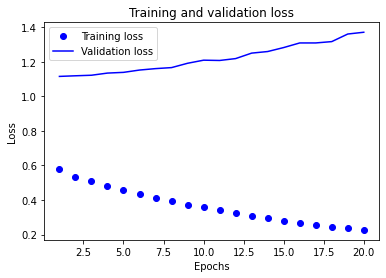

In [45]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

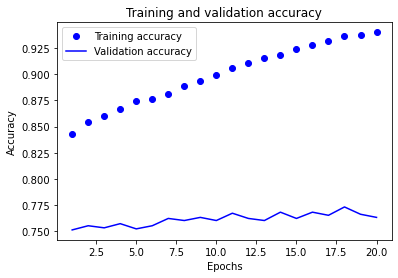

In [46]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 시각화 결과 epochs값이 9정도면 overfitting(과적합)의 위험에서 벗어날수 있음
####  아래 다시 재 훈련함(epochs : 9로 설정)

In [51]:
# fix model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 24ms/step - loss: 2.5021 - accuracy: 0.5064 - val_loss: 1.6693 - val_accuracy: 0.6460
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.3781 - accuracy: 0.7150 - val_loss: 1.2787 - val_accuracy: 0.7140
Epoch 3/9
16/16 [==============================] - 0s 20ms/step - loss: 1.0155 - accuracy: 0.7854 - val_loss: 1.1145 - val_accuracy: 0.7670
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.7930 - accuracy: 0.8317 - val_loss: 0.9914 - val_accuracy: 0.8000
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6213 - accuracy: 0.8712 - val_loss: 0.9557 - val_accuracy: 0.8080
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4968 - accuracy: 0.8980 - val_loss: 0.9141 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4015 - accuracy: 0.9153 - val_loss: 0.9008 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

In [52]:
results

[1.0410140752792358, 0.7796081900596619]

### 훈련된 모델로 새로운 데이터 예측

#### 다중분류의 출력값은 labels의 종류개수대로 나옴(현재는 하나의 기사당 46개의 결괏값이 나옴) : predictions[0]
#### 46개의 값중 np.argmax(predictions[0]) 를 활용해 최대값을 구하면 결과 토픽값이 나옴
#### 한개의 row data당 출력값의 총합은 1이 됨  : np.sum(predictions[0])

In [54]:
predictions = model.predict(x_test)
predictions

array([[7.3191241e-06, 5.6695117e-05, 2.3898039e-05, ..., 6.4931868e-07,
        7.3085293e-06, 1.9266402e-06],
       [6.9735927e-04, 5.2220240e-04, 1.4837821e-03, ..., 3.2731577e-06,
        7.9819685e-08, 2.1284783e-05],
       [1.9706404e-02, 6.0585845e-01, 5.7002656e-02, ..., 6.6077348e-04,
        8.4708969e-05, 2.9154986e-04],
       ...,
       [7.4152463e-06, 2.4859532e-04, 8.9022644e-05, ..., 7.0000328e-07,
        4.5113252e-06, 3.7783038e-06],
       [1.1504893e-03, 2.6648924e-02, 4.1508307e-03, ..., 6.8108580e-05,
        8.5221502e-05, 1.4107004e-04],
       [4.7371749e-04, 6.3671231e-01, 3.6041345e-02, ..., 2.8244749e-04,
        1.2788012e-05, 1.6284916e-04]], dtype=float32)

In [57]:
predictions[0]

array([7.31912405e-06, 5.66951167e-05, 2.38980392e-05, 7.65037119e-01,
       2.24246696e-01, 2.39560086e-06, 2.26781194e-05, 2.66318802e-05,
       1.76471658e-04, 1.13397196e-04, 7.19974851e-05, 1.70737691e-03,
       7.07453873e-05, 1.12211210e-05, 1.46794337e-04, 1.76997273e-05,
       3.17287951e-04, 8.79005893e-05, 9.15458713e-06, 8.46659299e-04,
       8.93461169e-04, 1.01681123e-03, 1.09623443e-05, 8.53228557e-05,
       2.27313740e-06, 1.34934835e-05, 5.13772693e-06, 3.95548341e-06,
       9.53313283e-05, 3.03328470e-05, 1.68623210e-05, 4.43124096e-04,
       5.16788486e-06, 1.99235237e-05, 1.84049277e-05, 3.32072045e-06,
       4.02266905e-03, 1.91655290e-05, 1.35821037e-05, 1.93503525e-04,
       1.06782973e-05, 5.82358152e-05, 8.29143210e-06, 6.49318679e-07,
       7.30852935e-06, 1.92664015e-06], dtype=float32)

In [58]:
np.argmax(predictions[0])

3

In [56]:
len(predictions)

2246

In [59]:
np.sum(predictions[0])

1.0000001

## 레이블과 손실을 다루는 다른 방법

In [60]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 2.7395 - accuracy: 0.3996 - val_loss: 1.9901 - val_accuracy: 0.5610
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.6661 - accuracy: 0.6146 - val_loss: 1.4895 - val_accuracy: 0.6320
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.3031 - accuracy: 0.6814 - val_loss: 1.3529 - val_accuracy: 0.6770
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1209 - accuracy: 0.7340 - val_loss: 1.2831 - val_accuracy: 0.6880
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0020 - accuracy: 0.7477 - val_loss: 1.3022 - val_accuracy: 0.6900
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9086 - accuracy: 0.7617 - val_loss: 1.2622 - val_accuracy: 0.7100
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8338 - accuracy: 0.7770 - val_loss: 1.2804 - val_accuracy: 0.7070
Epoch 8/20
63/63 [